In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reviews_df = pd.read_csv('data/reviews.csv', parse_dates = True)
reviews_df.head()

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
0,Mass Effect Legendary Edition Part 3: Mass Ef...,BioWare,Electronic Arts,2021-05-14,"Xbox One, PlayStation 4, PC","Compilation, RPG",8,Dan Stapleton
1,Call of Duty: Vanguard - Single-Player Campaign,"Treyarch, Sledgehammer Games",Activision,2021-11-05,"Xbox Series X|S, Xbox One, PlayStation 5, P...","Shooter, First-Person",7,Simon Cardy
2,Shin Megami Tensei V,Atlus,Atlus,2021-11-12,Nintendo Switch,RPG,8,Leana Hafer
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly
4,Riders Republic,Ubisoft Annecy,Ubisoft,2021-10-28,"Stadia, PlayStation 5, PlayStation 4, Xbox ...","Sports, Extreme Sports",8,Travis Northup


In [2]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         236 non-null    object
 1   developers    205 non-null    object
 2   publishers    232 non-null    object
 3   release_date  221 non-null    object
 4   platforms     234 non-null    object
 5   genres        235 non-null    object
 6   score         236 non-null    int64 
 7   reviewed_by   236 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.9+ KB


In [3]:
reviews_df['release_date'] = reviews_df['release_date'].replace('TBA 2021', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('Q4 2021', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('Q3 2021', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('TBA', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('TBA 2023', np.nan)
reviews_df['release_date'] = pd.to_datetime(reviews_df['release_date'])
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         236 non-null    object        
 1   developers    205 non-null    object        
 2   publishers    232 non-null    object        
 3   release_date  221 non-null    datetime64[ns]
 4   platforms     234 non-null    object        
 5   genres        235 non-null    object        
 6   score         236 non-null    int64         
 7   reviewed_by   236 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 14.9+ KB


In [4]:
(reviews_df.isnull().sum()/reviews_df.shape[0])*100

title            0.000000
developers      13.135593
publishers       1.694915
release_date     6.355932
platforms        0.847458
genres           0.423729
score            0.000000
reviewed_by      0.000000
dtype: float64

In [5]:
from collections import Counter
from itertools import chain


reviews_df['platforms'] = reviews_df['platforms'].fillna('NaN')
value_count_platforms = pd.Series(Counter(chain.from_iterable((reviews_df['platforms'].str.split(',  '))))).to_frame()
value_count_platforms = value_count_platforms.rename(columns = {0: 'platforms'})

In [6]:
value_count_platforms.sort_values(by = ['platforms'], ascending = False)

,platforms
PC,173
PlayStation 4,134
Xbox One,118
PlayStation 5,103
Nintendo Switch,93
Xbox Series X|S,91
Stadia,29
Tabletop,15
iPhone,10
Luna,6


In [7]:
from collections import Counter
from itertools import chain


reviews_df['genres'] = reviews_df['genres'].fillna('NaN')
value_count_genres = pd.Series(Counter(chain.from_iterable((reviews_df['genres'].str.split(',  '))))).to_frame()
value_count_genres = value_count_genres.rename(columns = {0: 'genres'})

In [8]:
value_count_genres.sort_values(by = ['genres'], ascending = False)

,genres
Action,78
RPG,57
Adventure,51
Shooter,23
Platformer,18
Strategy,18
Sports,13
Board,13
Racing,12
Hardware,10


In [9]:
reviews_df['publishers'].value_counts().to_frame()

,publishers
Electronic Arts,13
Square Enix,10
Nintendo,10
Ubisoft,7
Sony Interactive Entertainment,6
...,...
Schell Games,1
"ArtDink, ININ Games",1
nDreams,1
SteelSeries,1


In [10]:
reviews_df['score'].value_counts().to_frame()

,score
8,75
7,65
9,37
6,29
5,18
4,8
10,3
2,1


In [11]:
reviews_df[reviews_df['score'] == 10]

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly
53,Deathloop,Arkane Studios,Bethesda Softworks,2021-09-14,"PC, PlayStation 5",Action,10,Matt Purslow
153,Disco Elysium - The Final Cut,ZA/UM,ZA/UM,2021-03-30,"PlayStation 5, PlayStation 4, iPhone, Stadi...",RPG,10,Simon Cardy


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score'>

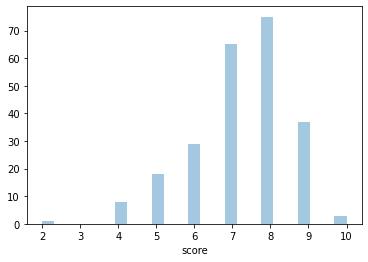

In [12]:
sns.distplot(reviews_df['score'], kde = False)

In [13]:
reviews_df['reviewed_by'].value_counts().to_frame() 

,reviewed_by
Tristan Ogilvie,17
Luke Reilly,16
Travis Northup,16
Leana Hafer,16
Mitchell Saltzman,15
Tom Marks,12
Gabriel Moss,12
Matt Thrower,11
Simon Cardy,11
Jon Bolding,7


In [14]:
reviews_df['genres'].value_counts()

Action                          21
RPG                             18
Adventure                       14
Action,  Adventure              12
Racing                          11
                                ..
Music                            1
RPG,  Roguelike / Rogue-Lite     1
RPG,  Shooter                    1
Romance,  RPG                    1
Platformer,  Productivity        1
Name: genres, Length: 98, dtype: int64